<a href="https://colab.research.google.com/github/wakamatsuikuma/Essence-of-Machine-Learning-1st-Editon/blob/main/5%E7%AB%A0_%E6%B1%8E%E5%8C%96%E6%80%A7%E8%83%BD%E3%81%A8%E9%81%8E%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

多項式回帰と線形回帰との差

In [ ]:
#線形回帰アルゴリズムの実装
import numpy as np
from scipy import linalg

#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class LinearRegression:
  def __init__(self):
    self.w_ = None
  
  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    b = np.dot(Xtil.T, t)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)
  

In [ ]:
# 多項式回帰の実装
import numpy as np

class PolynomialRegression:
  def __init__(self, degree):
    self.degree_ = degree
  
  def fit(self, x, y):
   
    xx = x.reshape(len(x), 1)
    x_pow = []
    for i in range(1, self.degree_ + 1):
      x_pow.append(xx**i)
    mat = np.concatenate(x_pow, axis=1)

    linreg = LinearRegression()
    linreg.fit(mat, y)
    self.w_ = linreg.w_
  
  def predict(self, x):
    r = 0
    for i in range(self.degree_ + 1):
      r += x**i * self.w_[i]
    return r 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.30031e-30): result may not be accurate.


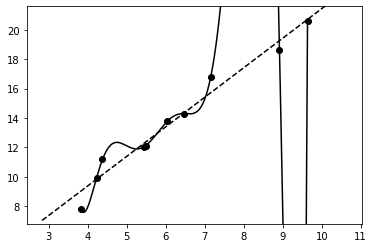

In [ ]:
# 実行　線形回帰の描画を多項式回帰と同様にしてみる
import numpy as np
import matplotlib.pyplot as plt

#データ生成
np.random.seed(0)

def f(x):
  return 1 + 2 * x

x = np.random.random(10)*10
y = f(x) + np.random.randn(10)

#訓練データのプロット
plt.scatter(x, y, color='k')

#多項式回帰
model = PolynomialRegression(10)
model.fit(x, y)
plt.ylim([y.min() - 1, y.max() + 1])
x_polyR = np.linspace(x.min(), x.max(), 300)
y_polyR = np.array([model.predict(u) for u in x_polyR])
plt.plot(x_polyR, y_polyR, color='k')


#線形回帰
model = LinearRegression()
model.fit(x, y)
b, a = model.w_
x_min = x.min()-1
x_max = x.max()+1
plt.plot([x_min, x_max], [a * x_min + b, a * x_max + b], color="k", linestyle="dashed")

plt.show()

モデルの汎化性能

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#線形回帰アルゴリズムの実装
import numpy as np
from scipy import linalg

#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class LinearRegression:
  def __init__(self):
    self.w_ = None
  
  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    b = np.dot(Xtil.T, t)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)
  
  # 多項式回帰の実装
import numpy as np

class PolynomialRegression:
  def __init__(self, degree):
    self.degree_ = degree
  
  def fit(self, x, y):
   
    xx = x.reshape(len(x), 1)
    x_pow = []
    for i in range(1, self.degree_ + 1):
      x_pow.append(xx**i)
    mat = np.concatenate(x_pow, axis=1)

    linreg = LinearRegression()
    linreg.fit(mat, y)
    self.w_ = linreg.w_
  
  def predict(self, x):
    r = 0
    for i in range(self.degree_ + 1):
      r += x**i * self.w_[i]
    return r 

In [ ]:
# 線形回帰と多項式回帰の予測値のフィット具合を確認
# 予測値を10万足して、その平均値を描画する＝実験的にバイアスの大きさが可視化できる


# 予測する関数の定義
def f(x):
  return 1 / (1 + x)

# モデル学習用のプロットデータの生成
def sample(n):
  x = np.random.random(n) * 5
  y = f(x)
  return x, y

# モデル検証用の説明変数生成
x_test = np.arange(0, 5, 0.01)


np.random.seed(99)



# 予測値の和を足していく用の配列生成
y_poly_sum = np.zeros(len(x_test))
y_lin_sum = np.zeros(len(x_test))

# 各モデルでの予測値和を計算
n = 100000

for _ in range(n):
   x, y = sample(5) # 学習データ生成
   model_poly = PolynomialRegression(4)
   model_poly.fit(x, y) # 多項式回帰モデルで学習
   model_lin = LinearRegression()
   model_lin.fit(x, y) # 線形回帰モデルで学習
   # 各モデルでの予測値和を計算
   y_poly = model_poly.predict(x_test)
   y_poly_sum += y_poly
   y_lin = model_lin.predict(x_test.reshape(-1, 1))
   y_lin_sum += y_lin

plt.plot(x_test, f(x_test), label="truth", color="k", linestyle="solid")
plt.plot(x_test, y_poly_sum / n, label="polynominal_reg", color="k", linestyle="dotted")
plt.plot(x_test, y_lin_sum / n, label="liner_reg", color="k", linestyle="dashed")

plt.legend()
plt.show()


"""
jupyter notebookではエラー出なかった
"""

LinAlgError: ignored

In [ ]:
# バイアスとバリアンスの図示
# 線形回帰と多項式回帰の予測値のフィット具合を確認
# 予測値を10万足して、その平均値を描画する＝実験的にバイアスの大きさが可視化できる


# 予測する関数の定義
def f(x):
    return 1 / (1 + x)

# モデル学習用のプロットデータの生成
def sample(n):
    x = np.random.random(n) * 5
    y = f(x)
    return x, y

# モデル検証用の説明変数生成
x_test = np.arange(0, 5, 0.01)


np.random.seed(99)



# 予測値を足していく用と予測値- 真値の差の2乗の和を足していく用の配列生成
y_poly_sum = np.zeros(len(x_test))
y_poly_sum_sqt = np.zeros(len(x_test))
y_lin_sum = np.zeros(len(x_test))
y_lin_sum_sqt = np.zeros(len(x_test))

y_true = f(x_test)

# 各モデルでの予測値和を計算
n = 100000

for _ in range(n):
    x, y = sample(5) # 学習データ生成
    model_poly = PolynomialRegression(4)
    model_poly.fit(x, y) # 多項式回帰モデルで学習
    model_lin = LinearRegression()
    model_lin.fit(x, y) # 線形回帰モデルで学習
    # 各モデルでの予測値和を計算
    y_poly = model_poly.predict(x_test)
    y_poly_sum += y_poly
    y_poly_sum_sqt += (y_poly - y_true)**2
    y_lin = model_lin.predict(x_test.reshape(-1, 1))
    y_lin_sum += y_lin
    y_lin_sum_sqt += (y_lin - y_true)**2

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Liner reg.")
ax2.set_title("Polynominal reg.")

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

ax1.fill_between(x_test, 0 , (y_lin_sum/n - y_true)**2, color="0.2", label="bias" )
ax1.fill_between(x_test, (y_lin_sum/n - y_true)**2 ,y_lin_sum_sqt / n , color="0.7", label="variance" )#試行回数が多いから、予測値の平均＝y_true(真値)としている？
ax1.legend(loc="upper left")

ax2.fill_between(x_test, 0 , (y_poly_sum/n - y_true)**2, color="0.2", label="bias" )
ax2.fill_between(x_test, (y_poly_sum/n - y_true)**2 , y_poly_sum_sqt / n , color="0.7", label="variance" )
ax2.legend(loc="upper left")


plt.show()


"""
jupyter notebookではエラー出なかった
"""

LinAlgError: ignored